## OpenAI Embeddings
For completeness, this is how to generate text-embeddings using the OpenAI API.

In [1]:
import openai
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def embed_openai(text):
    from openai import OpenAI
    client = OpenAI()

    response = client.embeddings.create(
        input=text,
        model="text-embedding-3-small"
    )
    return response.data[0].embedding

In [3]:
words = ["microscope", "cat", "fur", "black", "white"]

# Example of input dictionary
object_coords = {word: embed_openai(word) for word in words}

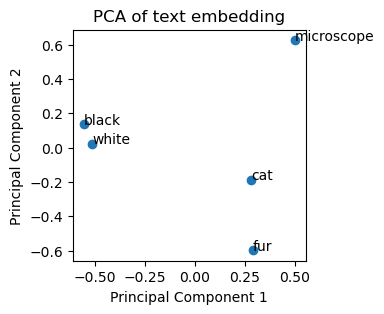

In [4]:
# Extract names and numerical lists
names = list(object_coords.keys())
data_matrix = np.array(list(object_coords.values()))

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
transformed_data = pca.fit_transform(data_matrix)

# Create scatter plot
plt.figure(figsize=(3, 3))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

# Annotate data points with names
for i, name in enumerate(names):
    plt.annotate(name, (transformed_data[i, 0], transformed_data[i, 1]))

plt.title('PCA of text embedding')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()